# Bericht und Code zum Beleg Maschinelles Lernen


Name:    
Matrikelnummer:

Name:   
Matrikelnummer:

### Gliederung

* [Code](#Code)
* [Bericht](#Bericht)
 * [Bewertung der Daten](#Bewertung-der-Daten)
 * ..
 * [Evaluation auf der Testmenge](Evaluation-auf-der-Testmenge)
 * [Literaturverzeichnis](#Literaturverzeichnis)

### Code


In [8]:
import pandas as pd
import numpy as np
import sklearn
import nltk


from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


from sklearn.svm import SVC
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm


from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords




In [2]:
class Tokenizer:
    def fit(self,*_):
        return self
    def transform(self,x,y=None,**fit_params):
        tokenized=df.apply(lambda row: nltk.word_tokenize(row['title']+" "+row['text'], language='english'), axis=1)
        stop_words = set(stopwords.words('english')) 
        return x.apply(lambda row: [w for w in row['title'] if not w in stop_words], axis=1)
        

In [3]:
# Die Datei sollte in dem selben Verzeichnis liegen, wie das notebook
# bitte den Pfad NICHT ändern, sodass es bei mir gleich durchläuft!
df = pd.read_csv('data_beleg.csv', encoding='utf-8')

# The column "label" is the target variable y which should be predicted

In [4]:
df

,Unnamed: 0,title,text,label
0,3250,Strawberry Pistachio Crumble A Spicy Perspective,When you re out in the berry patch drinking in...,1
1,4311,BBC News Study links Parkinson s disease to in...,13 November 2011 Last updated at 23 57 ET By N...,1
2,6544,Want to know the effect of a nuclear bomb on y...,By Damien Gayle UPDATED 13 12 EST 16 February ...,1
3,5328,Japanese Nail Art by NeverTooMuchGlitter by Ne...,Check out my featured work in the August Septe...,0
4,1402,How the New 5 Euro Bill is Made,A new 5 euro note will be circulating starting...,1
...,...,...,...,...
4646,2708,Halloween Dessert Recipe Chocolate Abyss hallo...,This delicious dish was created for the M M s ...,0
4647,6324,eat me delicious Cauliflower Gratin,Looking at this picture I m not sure if you ca...,1
4648,2777,Unusual Medical Uses For Duct Tape,Duct Tape is possibly the most incredible inve...,1
4649,1508,Reporter Flips Out from That Happened reporter...,"reporter flips out, news blooper, bug, south,...",0


# Bericht

## Bewertung der Daten

Lorem ipsum dolor sit amet, consetetur sadipscing elitr, sed diam nonumy eirmod tempor invidunt ut labore et dolore magna aliquyam erat, sed diam voluptua. At vero eos et accusam et justo duo dolores et ea rebum. Stet clita kasd gubergren, no sea takimata sanctus est Lorem ipsum dolor sit amet. Lorem ipsum dolor sit amet, consetetur sadipscing elitr, sed diam nonumy eirmod tempor invidunt ut labore et dolore magna aliquyam erat, sed diam voluptua. At vero eos et accusam et justo duo dolores et ea rebum. Stet clita kasd gubergren, no sea takimata sanctus est Lorem ipsum dolor sit amet.

Hier ist natürlich auch Code erlaubt. Es sollte aber übersichtlich bleiben!

Graphiken können auch mit Code erzeugt werden. Helper Funktionen eventuell in Code-Bereich auslagern. 

## Text Feature Extraction
Tokenizer -> Text Vektorisierung mit Bag of Words + TF-IDF (Erklärung und Exkurs mit Skicit learn)
* Bag of Words (BoW): BoW ist eine einfache Repräsentation, die in "Natural Language Processing" und "Information Retrieval verwendet werden. In diesem Model wird Text als ein "Bag" von Worten repräsentiert, unabhängigt von Grammatik oder sogar Reihenfolge, aber die Anzahl der Erscheinungen (Häufigkeit) eines Wortes wird behalten. z.B: "How the New 5 Euro Bill is Made, A new 5 euro note will be circulating starting", " wird so repräsentiert: 
    
    {"how":1, "the":1, "new": 2, "5": 2, "euro": 2, "bill": 1, "is": 1, "made": 1, "a": 1, "note": 1, "will": 1, "be": 1, "circulating": 1, "starting": 1}
    
    
* Das BoW Model hat auch einen Nachteil beim Text Klassifikator. Nur die Häufigkeit der Worten ist nicht genug für Klassifikation. Die übliche Worte wie (Deutsch) "der", "die", "das" spielen beim Traning des Klassifikators nah zu keine Rolle und können sogar das Ergebnis des Tranings negativ beeinflussen. Dieser Nachteil lässt sich in der Praxis meist mit Tf-idf Algorithmus ausgleichen, indem Worte anhand deren Häufigkeit in einem Dokument und der Häufigkeit in einem Satz von Dokumenten gewichtet werden. Wenn ein Wort häufig in einem Dokument erscheint, jedoch nicht in anderen Dokumenten, hat das Wort eine größere Wichtung. Wenn ein Wort überall häufig erscheint, ist das möglicherweise unwichtig und wird runter bewerten. Ziel des Algorithmus ist, die häufig vorkommende Worte wie "der", "die", "das" zu normalisieren, weil die nicht wichtig für das Training sind.


* Die Kombination von BoW und Tf-idf lässt sich sehr einfach mit Scikit-learn implementieren. Die Klasse "CountVectorizer" und "TfidfTransformer" vom Paket "sklearn.feature_extraction.text" können in der Pipeline verwendet werden. 

    Nachfolgend ein Beispiel, wie die Pipeline aussehen könnte:

```python
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

text_clf_svm = Pipeline([('vect', CountVectorizer()),
                          ('tfidf', TfidfTransformer())
                         #weitere Elemente für Pipeline
                        ])

```

### Exkurs: Einsatz eines Stemmer
Beispiel: https://www.datacamp.com/community/tutorials/stemming-lemmatization-python

## Feature Selection
### Feature Selection mittels Mutual Information

## Training Klassifikator 
### Tunning Parameter für jedes Model Grid Search / Random Search

Für jedes Model, das man für das Training verwenden würde, sind die Parameter ein unverzichbarer Teil. z.B beim Random Forest sind die Parameter beispielsweise: n_estimators, max_features, max_depth, min_samples_split.  Unterschiedliche Parameter Kombinationen beeinflussen die Genauigkeit des Models und der Vorhersage. Abhängigt von konkreten Problem und Anzahl der vorhandenen Daten sind die passende Parameter unterschiedlich. Es ist notwendig, verschiedene Parameter auszuprobieren, um die optimalen Parameter zu finden.

In der Praxis werden hauptsächlich zwei Methode verwendet, um Hyperparameter zu finden. Die sind "Grid Search" und "Random Search". Nachfolgend werden die Methode beschrieben.

* Grid Search: Grid Search probiert alle Kombination von Parametern aus und berechnet die Genauigkeit des Models. Der große Vorteil dieser Methode ist, dass keine Kombination von Parametern verpasst wird, und die optimalste Parameter werden korrekt ermittelt. Demgegenüber muss man allerdings damit rechnen, dass die Versuche so lange dauern könnten, wenn es zahlreiche Parameter geben würde. Es könnte Stunde, Tage und sogar Monaten dauern.
* Random Search: Wie der Name der Methode besagt, bei Random Search werden nur zufällige Kombinationen ausprobiert. Das heiß also, dass nicht alle Kombinationen für die Ermittlung der Genauigkeit verwendet werden und die optimalste Hyperparametern könnten verpasst werden. Im Vergleich zu Grid Search ist Random Search schneller, aber wegen dessen könnter die optimalste Kombination der Hyperparametern nicht korrekt ermittelt werden. Random Search wird empfohlen, wenn der Search Raum mehr als drei Dimensionen hat. Random Search wäre zeitlich effizienter, wenn es zu viele Parameter gibt.

Beider oben genannte Methode lassen sich mit scikit-learn implementieren. Nachfolgend werden Random Search verwendet, um die besten Hyperparameter für jedes Model zu finden.

### Logistic Regression Model
### Naive Bayes Model
### Linear Support Vector Machine ???
### Random Forest

## Evaluation

In [5]:
print ("Lorem ipsum dolor sit amet")

Lorem ipsum dolor sit amet


Eventuell auch Formeln zur Erläuterung,

$$
\text{BLU} = \int_0^1 f(x) dx
$$

#### Unterpunkt 1

At vero eos et accusam et justo duo dolores et ea rebum. Stet 

In [6]:
class NaiveBayesModel(object):
    def __init__(self):
        self.base_clf = self._init_pipeline()
        self.snowballStemmer_clf = self._init_snowballStemmer_pipeline()
        self.porterStemmer_clf=self._init_porterStemmer_pipeline()
        self.lancastersStemmer_clf=self._init_lancastersStemmer_pipeline()
        self.wordNetLemmatizer_clf=self._init_wordNetLemmatizer_pipeline()
    @staticmethod
    def lancasterstemmed_words(doc):
        stemmer=LancasterStemmer()
        return (stemmer.stem(w) for w in analyzer(doc))
    @staticmethod
    def porterstemmed_words(doc):
        stemmer=PorterStemmer()
        return (stemmer.stem(w) for w in analyzer(doc))
    @staticmethod
    def snowballstemmed_words(doc):
        stemmer=SnowballStemmer("english")
        return (stemmer.stem(w) for w in analyzer(doc))
    @staticmethod
    def wordNetLemmatized_words(doc):
        lemmatizer=WordNetLemmatizer()
        return (lemmatizer.lemmatize(w) for w in analyzer(doc))
    
    @staticmethod
    def _init_pipeline():
        pipe_line = Pipeline([
            ("vect", CountVectorizer()),#bag-of-words
            ("tfidf", TfidfTransformer()),#tf-idf
            ("clf", MultinomialNB())#model naive bayes
        ])
        return pipe_line
    
    @staticmethod
    def _init_snowballStemmer_pipeline():
            pipe_line = Pipeline([
               ("vect", CountVectorizer("english", analyzer=NaiveBayesModel.snowballstemmed_words)),#bag-of-words
               ("tfidf", TfidfTransformer()),#tf-idf
               ("clf", MultinomialNB())#model naive bayes
            ])
            return pipe_line
    @staticmethod
    def _init_lancastersStemmer_pipeline():
            pipe_line = Pipeline([
               ("vect", CountVectorizer("english", analyzer=NaiveBayesModel.lancasterstemmed_words)),#bag-of-words
               ("tfidf", TfidfTransformer()),#tf-idf
               ("clf", MultinomialNB())#model naive bayes
            ])
            return pipe_line
    @staticmethod
    def _init_porterStemmer_pipeline():
            pipe_line = Pipeline([
               ("vect", CountVectorizer("english", analyzer=NaiveBayesModel.porterstemmed_words)),#bag-of-words
               ("tfidf", TfidfTransformer()),#tf-idf
               ("clf", MultinomialNB())#model naive bayes
            ])
            return pipe_line
    @staticmethod
    def _init_wordNetLemmatizer_pipeline():
            pipe_line = Pipeline([
               ("vect", CountVectorizer("english", analyzer=NaiveBayesModel.wordNetLemmatized_words)),#bag-of-words
               ("tfidf", TfidfTransformer()),#tf-idf
               ("clf", MultinomialNB())#model naive bayes
            ])
            return pipe_line

In [7]:
analyzer = CountVectorizer().build_analyzer()
nBm=NaiveBayesModel()

train, test = train_test_split(df, test_size=0.1)
df_test = pd.DataFrame(test)

base_clf = nBm.base_clf.fit(train["title"],train.label)
porter_clf = nBm.porterStemmer_clf.fit(train["title"],train.label)
snowball_clf = nBm.snowballStemmer_clf.fit(train["title"],train.label)
lancaster_clf = nBm.lancastersStemmer_clf.fit(train["title"],train.label)
wordNetLemmatizer_clf = nBm.wordNetLemmatizer_clf.fit(train["title"],train.label)
test_data=[]
test_data.append({"title": "Unusual Medical Uses For Duct Tape 	", "target": "1"})

print("Höher sollte Besser sein?")
predict = base_clf.predict(df_test["title"])
print("Base")
print(base_clf.predict_proba(df_test["title"])[0][1])


predict = porter_clf.predict(df_test["title"])
print("porter")
print(porter_clf.predict_proba(df_test["title"])[0][1])


predict = snowball_clf.predict(df_test["title"])
print("snowball")
print(snowball_clf.predict_proba(df_test["title"])[0][1])

predict = lancaster_clf.predict(df_test["title"])
print("porter")
print(lancaster_clf.predict_proba(df_test["title"])[0][1])

predict = wordNetLemmatizer_clf.predict(df_test["title"])
print("wordNet")
print(wordNetLemmatizer_clf.predict_proba(df_test["title"])[0][1])


Höher sollte Besser sein?
Base
0.6016977784700087
porter
0.5558632190951408
snowball
0.5560454224103998
porter
0.5617889916571234
wordNet
0.5184533135806567


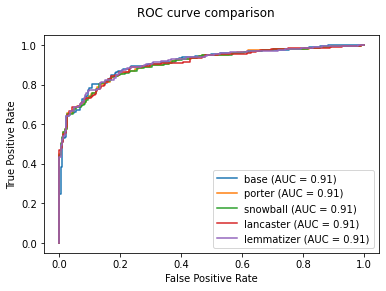

In [15]:
svc_disp = metrics.plot_roc_curve(base_clf, df_test["title"], df_test["label"],  name="base")
rfc_disp =  metrics.plot_roc_curve(porter_clf,df_test["title"], df_test["label"],name="porter", ax=svc_disp.ax_)
rfc_disp =  metrics.plot_roc_curve(snowball_clf,df_test["title"], df_test["label"],name="snowball", ax=svc_disp.ax_)
rfc_disp =  metrics.plot_roc_curve(lancaster_clf,df_test["title"], df_test["label"],name="lancaster", ax=svc_disp.ax_)
rfc_disp =  metrics.plot_roc_curve(wordNetLemmatizer_clf,df_test["title"], df_test["label"],name="lemmatizer", ax=svc_disp.ax_)

rfc_disp.figure_.suptitle("ROC curve comparison")

plt.show()

### Evaluation auf der Testmenge

In [17]:
# Da Sie das Test-Set nicht haben, Führen Sie dies mit den ursprünglichen Daten durch:
df_test = pd.read_csv('data_beleg.csv', encoding='utf-8')
# Wird von mir ersetzt durch
# df_test = pd.read_csv('data_test.csv', encoding='utf-8')
# und sollte dann auch durchlaufen!

In [18]:
y_test_true = ... # Variable für die Ground Truth des Test-Datensatzes. 

In [19]:
# Wenden Sie hier ihre Vorverarbeitung/Klassifikation ihres entgültigen Modells 
# an. 

# In dieser Variable sollte die Vorhersagewahrscheinlichkeit für die positive Klasse
# p(y=1 | x) gespeichte sein.
y_test_prob_class_1 = ... 

In [63]:
# This is the ROC-AUC evaluation metric for the test data set:
sklearn.metrics.roc_auc_score(y_test_true, y_test_prob_class_1)

### Literaturverzeichnis

